In [2]:
#import libs
import pandas as pd
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
%matplotlib inline

ts = pd.read_csv('/home/alessio/Scaricati/Richieste_al_minuto.csv', header=0, parse_dates=[0], index_col=0)
tsr = ts.resample(rule='30S').mean()

<AxesSubplot:xlabel='Time'>

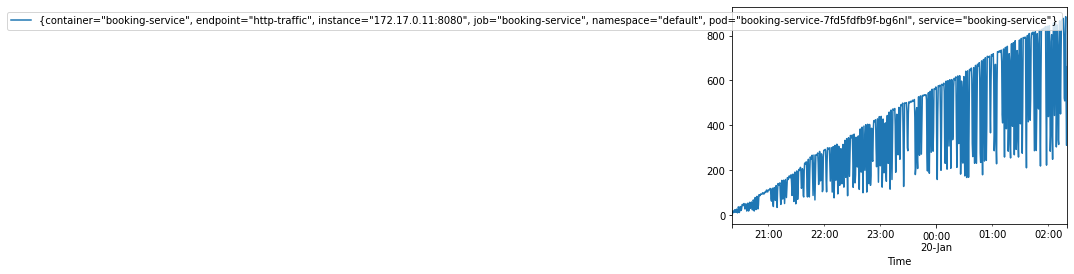

In [3]:
tsr.plot()

In [4]:
#Work on TREND
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(tsr, model='additive', period=320)
data = result.trend.dropna()

<AxesSubplot:xlabel='Time'>

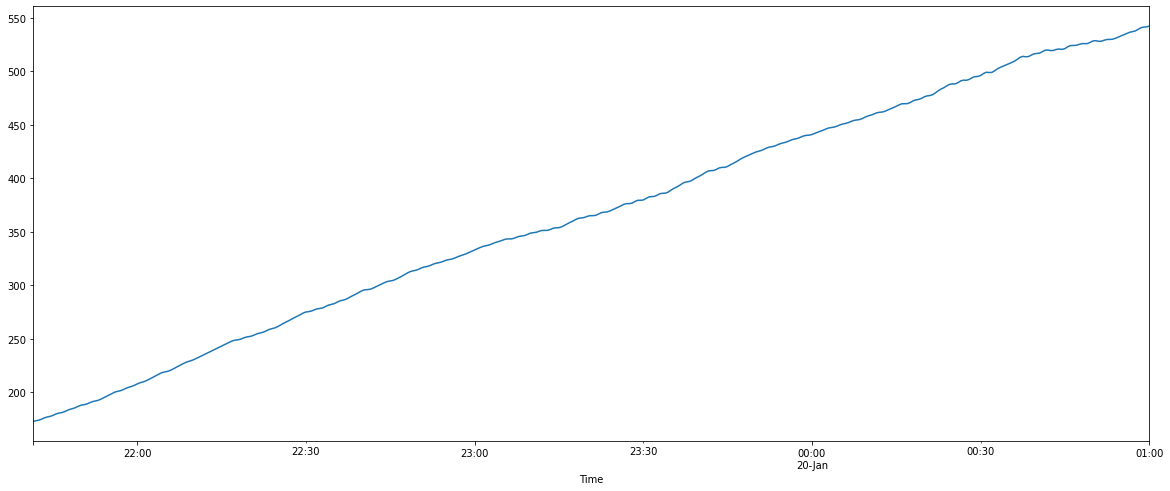

In [5]:
data.plot(figsize=(20,8))

In [6]:
data

Time
2022-01-19 21:41:30    172.863750
2022-01-19 21:42:00    173.563281
2022-01-19 21:42:30    174.025781
2022-01-19 21:43:00    174.970000
2022-01-19 21:43:30    176.200781
                          ...    
2022-01-20 00:58:00    539.114063
2022-01-20 00:58:30    540.681250
2022-01-20 00:59:00    541.381250
2022-01-20 00:59:30    541.512500
2022-01-20 01:00:00    542.307813
Freq: 30S, Name: trend, Length: 398, dtype: float64

<AxesSubplot:xlabel='Time'>

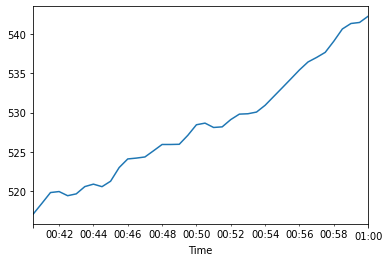

In [7]:
#Split training and test data (90/10)
train_data = data.iloc[:358] #prendo tutti i dati precendenti
test_data = data.iloc[358:] #provo a predire i dati successivi
test_data.plot()

In [8]:
#Load Specific forecasting tools
#from statsmodels.tsa.ar_model import AR, ARResults
from statsmodels.tsa.ar_model import AutoReg, AutoRegResults
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
#training, , modelliamo il modello. max lag vai massimo a 1 campione precedente
model = AutoReg(train_data, lags=125)
#model = AR(train_data)
#AR1fit = model.fit(maxlag=1, method='mle', disp=0)
AR1fit = model.fit()

In [10]:
#AR1fit.k_ar

In [11]:
#AR1fit.params

In [12]:
#Prediction
start = len(train_data)
end = start + len(test_data)-1
prediction1 = AR1fit.predict(start=start, end=end)
prediction1

2022-01-20 00:40:30    516.999630
2022-01-20 00:41:00    518.253852
2022-01-20 00:41:30    519.641643
2022-01-20 00:42:00    519.970748
2022-01-20 00:42:30    519.865745
2022-01-20 00:43:00    520.716465
2022-01-20 00:43:30    522.584048
2022-01-20 00:44:00    524.390241
2022-01-20 00:44:30    525.344794
2022-01-20 00:45:00    526.177691
2022-01-20 00:45:30    527.675128
2022-01-20 00:46:00    528.867440
2022-01-20 00:46:30    528.936085
2022-01-20 00:47:00    528.995717
2022-01-20 00:47:30    530.073668
2022-01-20 00:48:00    531.344637
2022-01-20 00:48:30    531.730713
2022-01-20 00:49:00    531.807389
2022-01-20 00:49:30    532.746407
2022-01-20 00:50:00    534.140968
2022-01-20 00:50:30    534.407362
2022-01-20 00:51:00    533.799425
2022-01-20 00:51:30    534.461109
2022-01-20 00:52:00    536.576191
2022-01-20 00:52:30    537.913162
2022-01-20 00:53:00    537.697594
2022-01-20 00:53:30    537.931453
2022-01-20 00:54:00    539.765757
2022-01-20 00:54:30    541.712596
2022-01-20 00:

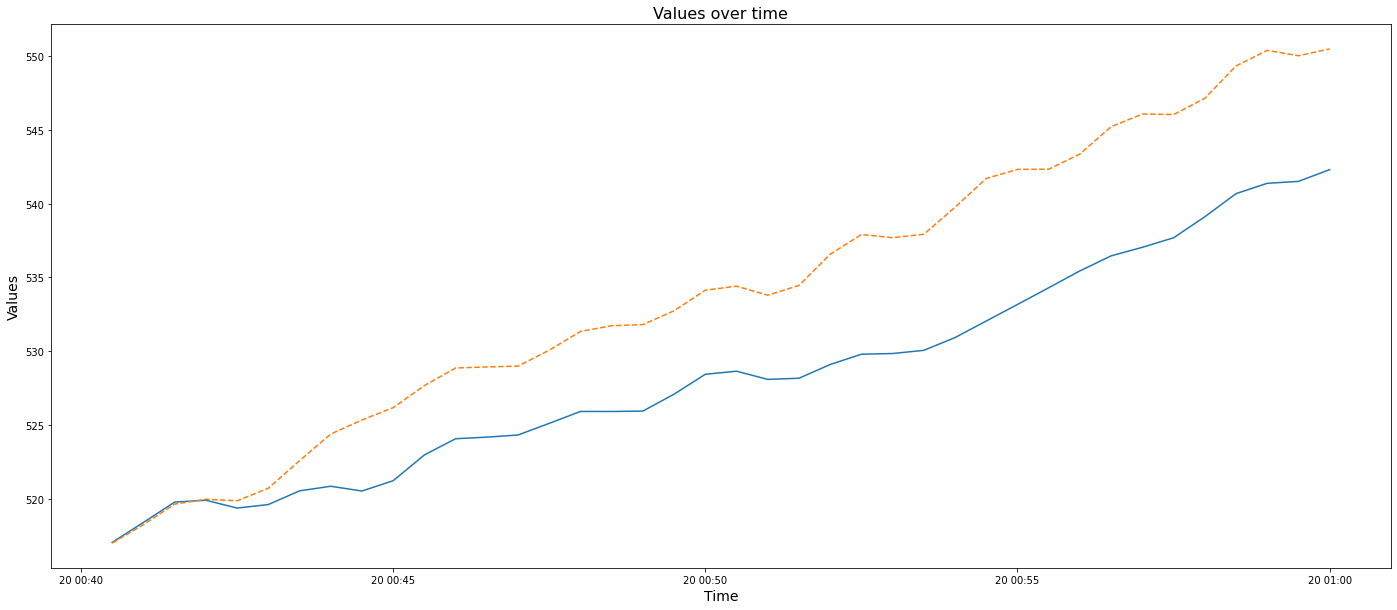

In [13]:
plt.figure(figsize=(24,10))
#add axes labels and title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(test_data, "-", label = 'tests')
plt.plot(prediction1,"--", label='pred')


In [14]:
#training LET INCREASE THE LAG
#model = AR(train_data)
#AR12fit = model.fit(maxlag=12, method='mle', disp=0)
model = AutoReg(train_data, lags=12)
AR12fit = model.fit()

In [15]:
prediction12 = AR12fit.predict(start=start, end=end)

In [16]:
#training LET INCREASE THE LAG
#model = AR(train_data)
#AR5fit = model.fit(maxlag=5, method='mle', disp=0)
model = AutoReg(train_data, lags=5)
AR5fit = model.fit()
prediction5 = AR5fit.predict(start=start, end=end)
prediction5

2022-01-20 00:40:30    517.120737
2022-01-20 00:41:00    518.629888
2022-01-20 00:41:30    520.288193
2022-01-20 00:42:00    520.980663
2022-01-20 00:42:30    521.333980
2022-01-20 00:43:00    522.474618
2022-01-20 00:43:30    524.004233
2022-01-20 00:44:00    524.807082
2022-01-20 00:44:30    525.081276
2022-01-20 00:45:00    525.927789
2022-01-20 00:45:30    527.369723
2022-01-20 00:46:00    528.390826
2022-01-20 00:46:30    528.798412
2022-01-20 00:47:00    529.511596
2022-01-20 00:47:30    530.866637
2022-01-20 00:48:00    532.054512
2022-01-20 00:48:30    532.613784
2022-01-20 00:49:00    533.218312
2022-01-20 00:49:30    534.415018
2022-01-20 00:50:00    535.666239
2022-01-20 00:50:30    536.366422
2022-01-20 00:51:00    536.915892
2022-01-20 00:51:30    537.953569
2022-01-20 00:52:00    539.216615
2022-01-20 00:52:30    540.061498
2022-01-20 00:53:00    540.623448
2022-01-20 00:53:30    541.529340
2022-01-20 00:54:00    542.760965
2022-01-20 00:54:30    543.727009
2022-01-20 00:

In [17]:
#training LET INCREASE THE LAG
#model = AR(train_data)
#AR5fit = model.fit(maxlag=5, method='mle', disp=0)
model = AutoReg(train_data, lags=5)
AR50fit = model.fit()
prediction50 = AR50fit.predict(start=start, end=end)

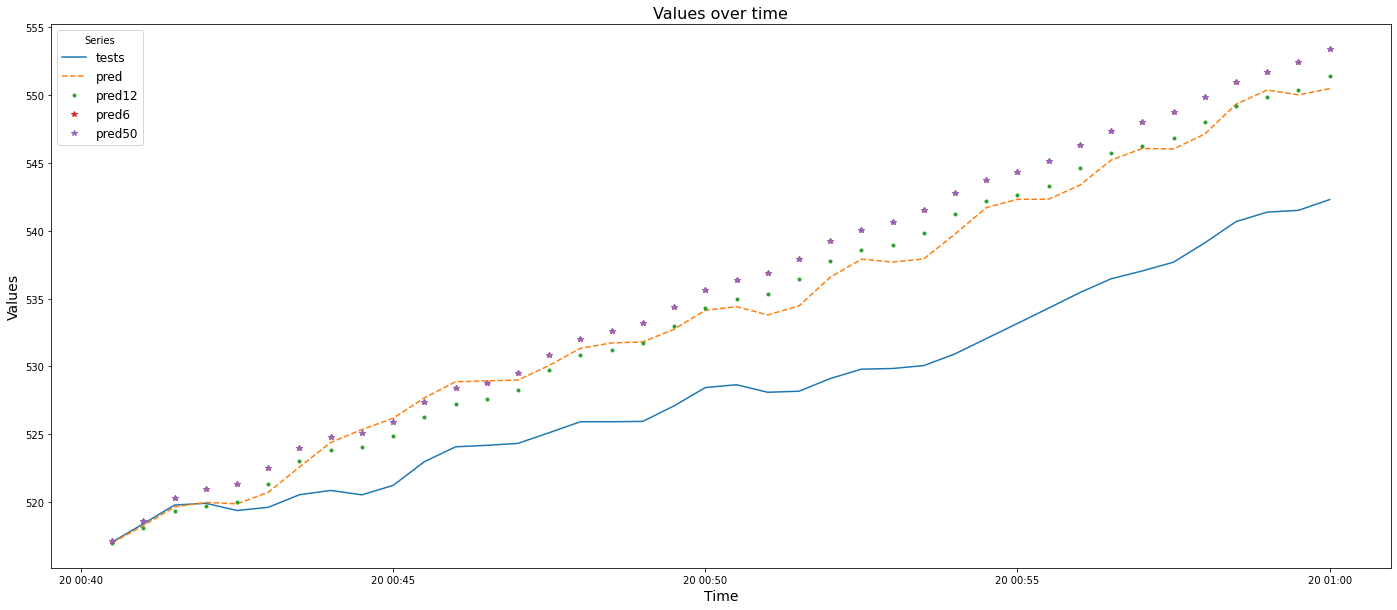

In [18]:
plt.figure(figsize=(24,10))
#add axes labels and title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(test_data, "-", label = 'tests')
plt.plot(prediction1,"--", label='pred')
plt.plot(prediction12,".", label='pred12')
plt.plot(prediction5,"*", label='pred6')
plt.plot(prediction50,"*", label='pred50')
#add legend
plt.legend(title='Series', fontsize=12)

In [19]:
#Evaluate the model (min 1.18.50)
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(5)','AR(12)']
preds = [prediction1, prediction5, prediction12]

for i in range(3):
    error = mean_squared_error(test_data, preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 41.57756205
AR(5) Error: 67.56138892
AR(12) Error: 46.63446692


In [20]:
#Forecasting
#Firstm retrain the model on the full dataset
#model = AR(data)
#model = AutoReg(data, lags=50)

#Next, fit the model
#ARfit = model.fit(maxlag=6, method='mle', disp=0)
#ARfit = model.fit()

#make predictions
#fcast = ARfit.predict(start=len(data), end=(start + len(data+70)), dynamic=False).rename('Forecast')

#Plot the results
#data.plot(legend=True)
#fcast.plot(legend=True, figsize=(20,12));

In [21]:
data
#Split training and test data (90/10)
train_data = data.iloc[:358] #prendo tutti i dati precendenti
test_data = data.iloc[358:] #provo a predire i dati successivi
from pmdarima import auto_arima

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
auto_arima(train_data)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

In [22]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
model=ARIMA(train_data,order=(3,1,3))

In [23]:
results = model.fit()
results.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  358
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 224.776
Date:                Mon, 24 Jan 2022   AIC                           -435.552
Time:                        19:17:14   BIC                           -408.408
Sample:                    01-19-2022   HQIC                          -424.755
                         - 01-20-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1908      0.043     27.449      0.000       1.106       1.276
ar.L2         -1.0067      0.054    -18.739      0.000      -1.112      -0.901
ar.L3          0.8117      0.030     26.692      0.000       0.752       0.871
ma.L1          1.3267      0.067     19.916      0.000       1.196       1.457
ma.L2         -0.0518      0.125     -0.413      0.680      -0.298       0.194
ma.L3         -0.3804      0.070     -5.463      0.000      -0.517      -0.244
sigma2         0.0157      0.001     16.729      0.000       0.014       0.018
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):               124.69
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

<AxesSubplot:>

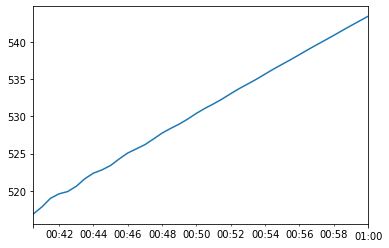

In [25]:
predictions.plot()

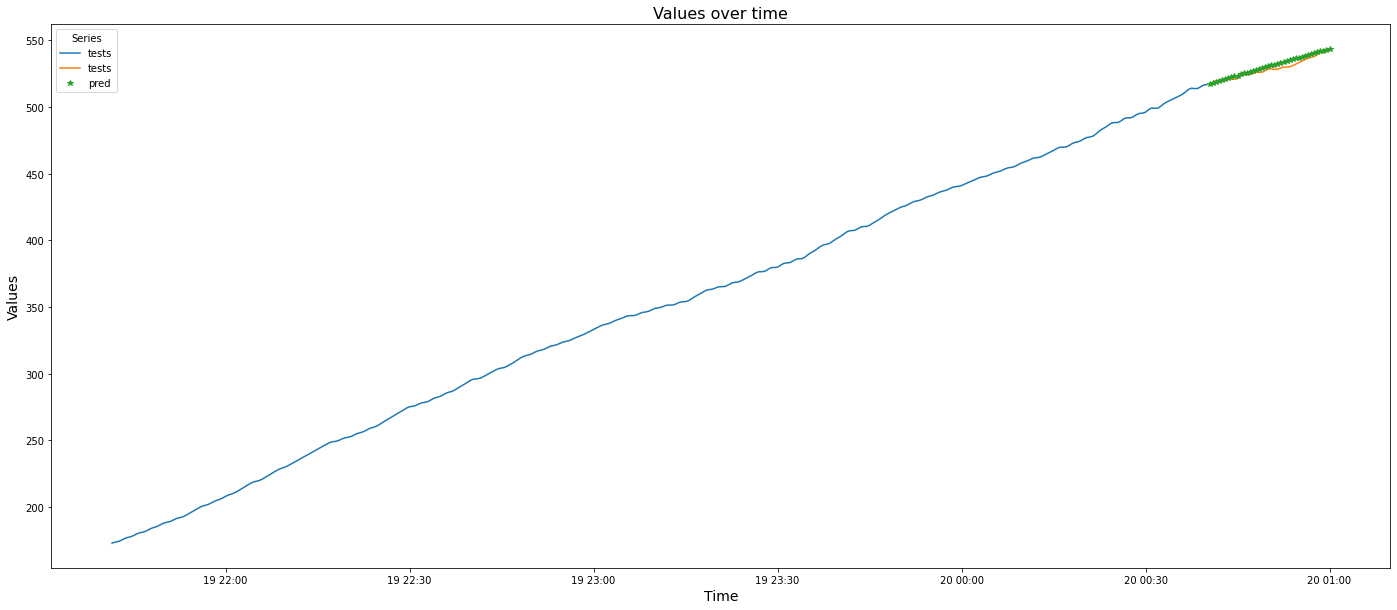

In [26]:
plt.figure(figsize=(24,10))
#add axes labels and title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(train_data,"-", label = 'tests')
plt.plot(test_data, "-", label = 'tests')
plt.plot(predictions,"*", label='pred')

plt.legend(title='Series')

In [27]:
auto_arima(data)

ARIMA(order=(4, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

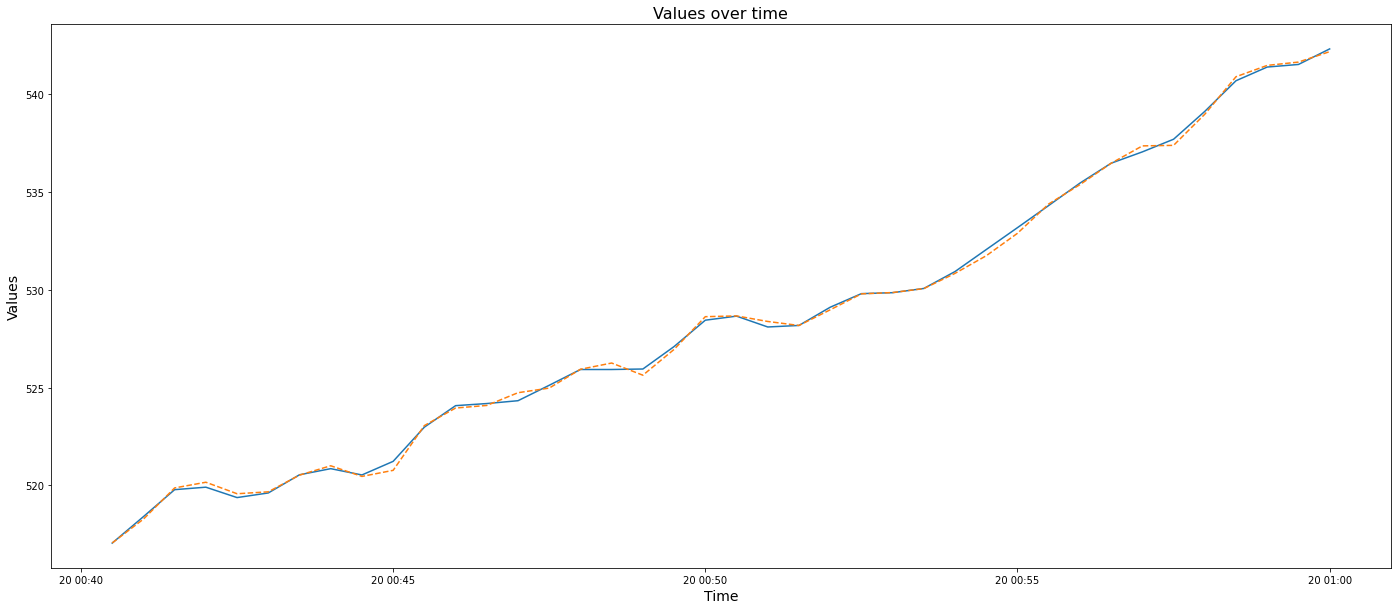

In [29]:
#Split training and test data (90/10)
train_data = data.iloc[:358] 
test_data = data.iloc[358:] 

#training, , modelliamo il modello. max lag vai massimo a 1 campione precedente

model = ARIMA(data, order=(4, 2, 0))
#AR1fit = model.fit(maxlag=1, method='mle', disp=0)
SARfit = model.fit()

#Prediction
start = len(train_data)
end = start + len(test_data)-1
prediction1 = SARfit.predict(start=start, end=end)

plt.figure(figsize=(24,10))
#add axes labels and title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(test_data, "-", label = 'tests')
plt.plot(prediction1,"--", label='pred')

In [30]:
from sklearn.metrics import mean_squared_error 
error = mean_squared_error(test_data,predictions)
error

6.75538324410797

In [31]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_data, predictions)
error

2.5991120106890295

In [32]:
data.describe()

count    398.000000
mean     365.670305
std      108.203903
min      172.863750
25%      276.307422
50%      365.135781
75%      458.890625
max      542.307813
Name: trend, dtype: float64